In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler #is used for feature scaling, specifically for scaling numerical features to a specified range, typically between 0 and 1.
from sklearn.model_selection import train_test_split #is used to split a dataset into separate training and testing sets 

from sklearn.linear_model import LinearRegression , Lasso , Ridge
from sklearn.metrics import mean_squared_error , r2_score 

<img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/images/optimized/rev-7841bc2/www.sharpsightlabs.com/wp-content/uploads/2022/05/train-test-split_simple-visual-example_v2.png" style="width:600px;height:370px" >



# **EDA**

In [2]:
df = pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv", encoding ='ISO-8859-1' )
df 

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


# **preprocessing**

# 1.Drop unneeded columns 

In [4]:
df.drop(columns = ["customer name", "customer e-mail", "country"] , inplace=True)
df.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


# 2.Define features X and target Y

In [5]:
x = df.drop(columns=["car purchase amount"])
y = df["car purchase amount"]

In [6]:
# another way but by iloc[rows, columns]
#x = df.iloc[:, :-1]
# y= df.iloc[:, -1]

In [7]:
x 

,gender,age,annual Salary,credit card debt,net worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...
495,0,41.462515,71942.40291,6995.902524,541670.1016
496,1,37.642000,56039.49793,12301.456790,360419.0988
497,1,53.943497,68888.77805,10611.606860,764531.3203
498,1,59.160509,49811.99062,14013.034510,337826.6382


In [8]:
y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: car purchase amount, Length: 500, dtype: float64

# 3.Data Scaling

# Different features in a dataset might have varying scales or units. Some algorithms are sensitive to feature scales, potentially leading to biased or inaccurate models. MinMaxScaler scales features to a specified range (commonly between 0 and 1), ensuring all features have a consistent scale.

In [9]:
y.shape 

(500,)

In [10]:
#we should making y into 2D array to make scaling (y.values.reshape(-1,1))

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(x)
Y = scaler.fit_transform(y.values.reshape(-1,1))

In [12]:
X

array([[0.        , 0.4370344 , 0.53515116, 0.57836085, 0.22342985],
       [0.        , 0.41741247, 0.58308616, 0.476028  , 0.52140195],
       [1.        , 0.46305795, 0.42248189, 0.55579674, 0.63108896],
       ...,
       [1.        , 0.67886994, 0.61110973, 0.52822145, 0.75972584],
       [1.        , 0.78321017, 0.37264988, 0.69914746, 0.3243129 ],
       [1.        , 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

# 4.Data splitting

In [13]:
# the test size is the amount he train in it test_size = 0.1 (10%)
#the shuffle make it doesn't train in part without the other parts
# you put in random_state any number to randomize the data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, shuffle = True, random_state=42)

In [14]:
X_train.shape

(450, 5)

# **LinearRegression model**

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [16]:
lr_model.score(X_train, Y_train)


0.9999999811559965

In [17]:
# I make the model predict the value of x_test to compare y_pred withe y_test
Y_pred = lr_model.predict(X_test)

# calculate Mean square error

<img src="https://www.i2tutorials.com/wp-content/media/2019/11/Differences-between-MSE-and-RMSE-1-i2tutorials.jpg" style="width:370px;height:250px">

In [18]:
# I compare between Y_test and Y_pred
print(mean_squared_error(Y_test, Y_pred))

4.050194566516783e-10


# calculate R^2

<img src="https://miro.medium.com/v2/resize:fit:1036/1*D9wPS2odLYsNOvOLffOMCw.png" style="width:370px;height:250px">

In [19]:
print(r2_score(Y_test, Y_pred))

0.999999980060625


# **Lasso**

In [20]:
#the alpha parameter controls the strength of regularization applied to the model.
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.0001)

In [21]:
lasso.score(X_train, Y_train)

0.9999500261071721

In [22]:
y_pred = lasso.predict(X_test)

In [23]:
print(mean_squared_error(Y_test, y_pred))

1.132859598770286e-06


In [24]:
print(r2_score(Y_test, y_pred))

0.9999442285746711


# **Ridge**

In [25]:
ridge = Ridge(alpha=0.00001)
ridge.fit(X_train, Y_train)

Ridge(alpha=1e-05)

In [26]:
ridge.score(X_train, Y_train)

0.9999999811552064

In [27]:
y_pred = ridge.predict(X_test)

In [28]:
print(mean_squared_error(Y_test, y_pred))

4.0461875069014285e-10


In [29]:
print(r2_score(Y_test, y_pred))

0.999999980080352


# **L1 = Lasso   //// L2 = Ridge**

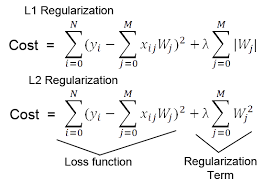